<a href="https://colab.research.google.com/github/abdnafees/fastai-lesson2-hw/blob/master/fastai_lesson2_apple_diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install all the dependencies required

In [1]:
!pip uninstall torch -y
!pip uninstall torchvision -y
!pip install torch==1.4.0 torchvision==0.5.0

!curl -s https://course.fast.ai/setup/colab | bash
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Uninstalling torch-1.5.0+cu101:
  Successfully uninstalled torch-1.5.0+cu101
Uninstalling torchvision-0.6.0+cu101:
  Successfully uninstalled torchvision-0.6.0+cu101
     |████████████████████████████████| 753.4MB 22kB/s 
     |████████████████████████████████| 4.0MB 46.4MB/s 
Updating fastai...
Done.


Setup Google drive to work with Google Colab

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Import libraries

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [4]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 9.1MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-cp36-none-any.whl size=72859 sha256=631e8f1eef18bf7044c9842b45a5ec8bba368a7c0f252c13925d3da9b0d9635b
  Stored in directory: /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
Successfully built kaggle
  Found existing installation: kaggle 1.5.6
    Uninstalling kaggle-1.5.6:
      Successfully uninstalled kaggle-1.5.6


In [0]:
import os
os.environ['KAGGLE_USERNAME'] = "nikku23"
os.environ['KAGGLE_KEY'] = "6f730301eef9a886caa98b5a20273cb0"

In [0]:
%cd /content/gdrive/My Drive/fastai-v3
!mkdir test
%cd /content/gdrive/My Drive/fastai-v3/test
!kaggle competitions download -c plant-pathology-2020-fgvc7

/content/gdrive/My Drive/fastai-v3
/content/gdrive/My Drive/fastai-v3/test
 99% 769M/779M [00:13<00:00, 62.6MB/s]
100% 779M/779M [00:13<00:00, 62.1MB/s]


In [0]:
!unzip plant-pathology-2020-fgvc7

In [0]:
%cd /content/gdrive/My Drive/fastai-v3/plant_pathology
import csv

def create_row(old_row):
  row_data = {}
  row_data['image_id'] = old_row['image_id']
  if old_row['healthy'] == '1':
    row_data['class'] = 'healthy'
  elif old_row['multiple_diseases'] == '1':
    row_data['class'] = 'multiple_diseases'
  elif old_row['rust'] == '1':
    row_data['class'] = 'rust'
  elif old_row['scab'] == '1':
    row_data['class'] = 'scab'
  return row_data

def create_file(file_name):
  with open(file_name, 'w') as new_file:
    writer = csv.DictWriter(new_file, fieldnames=['image_id', 'class'])
    with open('train.csv') as old_file:
      for row in csv.DictReader(old_file):
        writer.writerow(create_row(row))

create_file('train_parsed.csv')

/content/gdrive/My Drive/fastai-v3/test


In [0]:
data = ImageDataBunch.from_csv(path=base_dir + "/plant_pathology", folder="images", csv_labels="train_parsed.csv", suffix='.jpg', ds_tfms = get_transforms(), size=244, bs=32).normalize(imagenet_stats)

In [11]:
print(data.classes)

['healthy', 'multiple_diseases', 'rust', 'scab']


In [12]:
print(data.c)

4


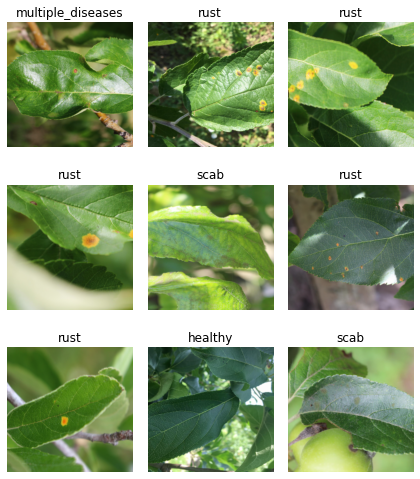

In [13]:
data.show_batch(rows=3, figsize=(6,7))

In [14]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [16]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.670696,0.464478,0.131868,04:39
1,0.666914,0.508242,0.156593,02:17
2,0.516272,0.403437,0.131868,02:18
3,0.450878,0.389572,0.129121,02:19


In [0]:
learn.save('stage-1')

In [18]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (1456 items)
x: ImageList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
healthy,rust,healthy,multiple_diseases,scab
Path: /content/gdrive/My Drive/fastai-v3/plant_pathology;

Valid: LabelList (364 items)
x: ImageList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
healthy,healthy,healthy,healthy,healthy
Path: /content/gdrive/My Drive/fastai-v3/plant_pathology;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padd

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

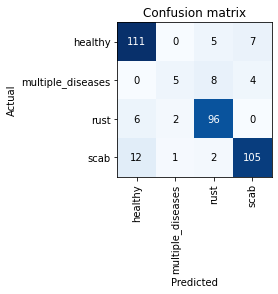

In [20]:
interp.plot_confusion_matrix()

In [21]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


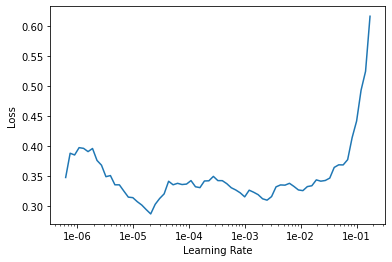

In [22]:
learn.recorder.plot()

In [0]:
learn.save('stage-1')
learn.unfreeze()

In [24]:
learn.fit_one_cycle(4, max_lr=slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.347363,0.381254,0.118132,02:16
1,0.343020,0.376796,0.118132,02:19
2,0.336271,0.378273,0.115385,02:17
3,0.336683,0.372208,0.118132,02:20


In [0]:
learn.save('stage-1-2')

In [27]:
learn.fit_one_cycle(4, max_lr=slice(5e-06, 5e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.256790,0.278540,0.074176,02:17
1,0.223202,0.318669,0.087912,02:18
2,0.177616,0.280218,0.085165,02:18
3,0.127956,0.263134,0.071429,02:18


In [0]:
learn.save('stage-1-3')

In [29]:
learn.fit_one_cycle(4, max_lr=slice(5e-05, 5e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.091375,0.328172,0.085165,02:18
1,0.164615,0.348016,0.082418,02:18
2,0.176105,0.220101,0.057692,02:17
3,0.135928,0.224417,0.060440,02:17


In [0]:
learn.save('stage-1-4')

In [31]:
learn.fit_one_cycle(3, max_lr=slice(5e-05, 5e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.097447,0.210701,0.060440,02:17
1,0.094118,0.256071,0.065934,02:18
2,0.074697,0.243945,0.065934,02:17


In [0]:
learn.save('stage-1-5')

In [33]:
learn.fit_one_cycle(3, max_lr=slice(5e-05, 5e-02))

epoch,train_loss,valid_loss,error_rate,time
0,1.156939,1240.586914,0.684066,02:18
1,1.544729,0.764591,0.126374,02:17
2,1.001688,0.583503,0.104396,02:17


In [34]:
learn.load('stage-1-4')

Learner(data=ImageDataBunch;

Train: LabelList (1456 items)
x: ImageList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
healthy,rust,healthy,multiple_diseases,scab
Path: /content/gdrive/My Drive/fastai-v3/plant_pathology;

Valid: LabelList (364 items)
x: ImageList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
healthy,healthy,healthy,healthy,healthy
Path: /content/gdrive/My Drive/fastai-v3/plant_pathology;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padd

In [0]:
learn.export()

In [0]:
learn = load_learner('/content/gdrive/My Drive/fastai-v3/plant_pathology')

In [37]:
%cd /content/gdrive/My Drive/fastai-v3/plant_pathology

print_interval = 50
classes = ['healthy', 'multiple_diseases', 'rust', 'scab']
base_path = '/content/gdrive/My Drive/fastai-v3/plant_pathology/images/'

def get_predictions(image_id, image_number):
  predicted_class,_,probabilities = learn.predict(open_image(base_path + image_id + '.jpg'))
  output_dict = {}
  output_dict["image_id"] = image_id
  for idx,clazz in enumerate(classes):
    # add prediction value for each class with 10 digits
    output_dict[clazz] = '{:.10f}'.format(probabilities.numpy()[idx])
  # document progress every [print_interval]th image
  if image_number % print_interval == 0:
    print(image_id + " - " + str(predicted_class) + ' - ' + str(probabilities.numpy()))

  return output_dict

def create_output_csv(input_csv, output_csv):
  with open(output_csv, 'w') as output:
    writer = csv.DictWriter(output, fieldnames=['image_id'] + classes)
    writer.writeheader()
    with open(input_csv) as input:
      # add row for each image with predictions
      for idx,(row) in enumerate(csv.DictReader(input)):
        writer.writerow(get_predictions(row['image_id'], idx))

create_output_csv('test.csv', 'submission.csv')

/content/gdrive/My Drive/fastai-v3/plant_pathology
Test_0 - rust - [9.220310e-09 1.288044e-06 9.999987e-01 4.877751e-09]
Test_50 - rust - [5.184123e-05 9.323225e-04 9.989887e-01 2.716894e-05]
Test_100 - scab - [8.149264e-07 8.788703e-07 6.537328e-13 9.999983e-01]
Test_150 - scab - [1.637941e-04 3.597350e-02 9.501759e-05 9.637677e-01]
Test_200 - rust - [5.890457e-07 2.636221e-04 9.997357e-01 6.959594e-08]
Test_250 - healthy - [9.999419e-01 3.829365e-06 5.316124e-05 1.031671e-06]
Test_300 - healthy - [0.782389 0.104089 0.010999 0.102524]
Test_350 - scab - [2.399432e-06 7.145909e-03 1.125842e-06 9.928505e-01]
Test_400 - rust - [8.540513e-07 3.350788e-04 9.996641e-01 7.434593e-10]
Test_450 - rust - [1.395271e-05 9.566861e-09 9.999861e-01 1.978362e-12]
Test_500 - rust - [1.215609e-06 1.620055e-06 9.999971e-01 1.607460e-09]
Test_550 - scab - [1.110407e-05 4.036171e-03 5.827765e-08 9.959527e-01]
Test_600 - rust - [6.636015e-07 9.515554e-04 9.990478e-01 2.187996e-09]
Test_650 - rust - [7.64100